# 216 Kleopatra Example Notebook

Use the Python Interface (v.3.3) and the file `mesh/216Kleopatra.obj` to evaluate this polyhedral gravity model.
First the necessary imports:

In [1]:
import polyhedral_gravity as model
from polyhedral_gravity import Polyhedron, PolyhedronIntegrity, NormalOrientation, GravityEvaluable, MetricUnit
import numpy as np
import mesh_plotting
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
%load_ext autoreload
%autoreload 2

print("Polyhedral Gravity Metadata:")
print(f"Version:                 {model.__version__}")
print(f"Parallelization Backend: {model.__parallelization__}")
print(f"Commit Hash:             {model.__commit__}")
print(f"Logging Level:           {model.__logging__}")

Polyhedral Gravity Metadata:
Version:                 3.3rc1
Parallelization Backend: TBB
Commit Hash:             92b0ad7a
Logging Level:           INFO


We create the polyhedron and plot it:

In [2]:
kleopatra_mesh_file = "./mesh/216Kleopatra.obj"
kleopatra_density = 3.6e12 # kg/km^3
kleopatra: Polyhedron = Polyhedron(
    polyhedral_source=[kleopatra_mesh_file],
    density=kleopatra_density,
    normal_orientation=NormalOrientation.OUTWARDS,
    integrity_check=PolyhedronIntegrity.DISABLE,
    metric_unit=MetricUnit.KILOMETER,
)
vertcies = np.array(kleopatra.vertices)
faces = np.array(kleopatra.faces)
kleopatra

<polyhedral_gravity.Polyhedron, density = 3.6e+12 kg/km^3, vertices = 2048, faces = 4092, orientation = OUTWARDS, mesh_unit = 'km'>

Plotting Triangulation


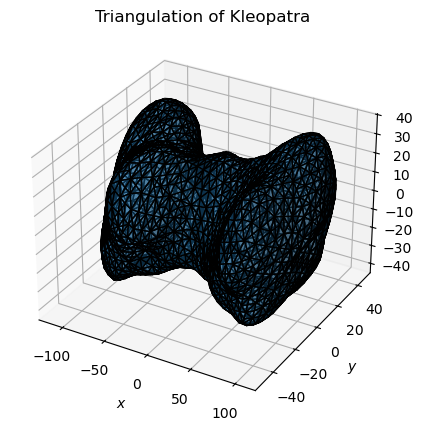

In [3]:
mesh_plotting.plot_triangulation(vertcies, faces, "Triangulation of Kleopatra")

In [4]:
evaluable_kleopatra = GravityEvaluable(kleopatra)
evaluable_kleopatra

<polyhedral_gravity.GravityEvaluable, polyhedron = <polyhedral_gravity.Polyhedron, density = 3.6e+12 kg/km^3, vertices = 2048, faces = 4092, orientation = OUTWARDS, mesh_unit = 'km'>, output_units = km^2/s^2, km/s^2, 1/s^2>

## XY-Plane of the Kleopatra

Let's have look at the XY plane, i.e., the Z coordinate is zero.

In [38]:
X = np.arange (-175, 175, 1)
Y = np.arange(-175, 175, 1)

# We require Z to be zero for the XY plane
computation_points = np.array(np.meshgrid(X, Y, [0])).T.reshape(-1, 3)
gravity_results = evaluable_kleopatra(
    computation_points=computation_points,
)

We first investigate the potential of Kleopatra. Notice that we can retrieve the units directly from the `Polyhedron` and `GravityEvaluable` instances.

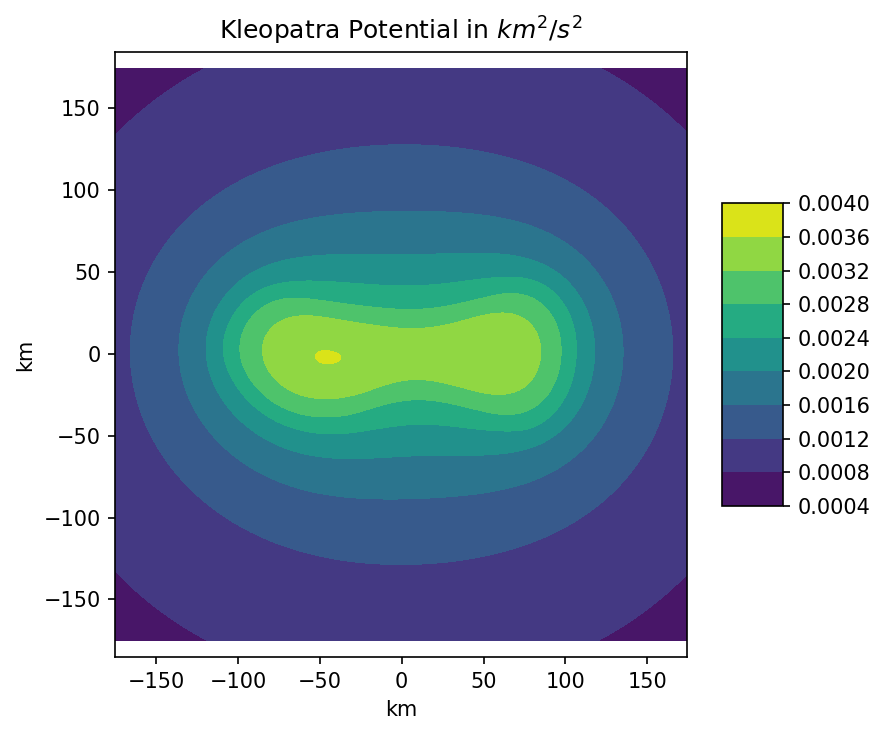

In [33]:
potentials = np.array([i[0] for i in gravity_results])
potentials = potentials.reshape((len(X), len(Y)))

plotX = computation_points[:, 0].reshape(len(X), -1)
plotY = computation_points[:, 1].reshape(len(Y), -1)
plotZ = potentials.reshape((len(X), len(Y)))

fig, ax = plt.subplots(figsize=(6, 5), dpi=150)
surf = ax.contourf(plotX, plotY, plotZ, cmap=cm.viridis)

ax.set_title(f"Kleopatra Potential in ${evaluable_kleopatra.output_units[0]}$")
ax.axis('equal')
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())

# Setting the x-axis and y-axis titles
ax.set_xlabel(kleopatra.mesh_unit)
ax.set_ylabel(kleopatra.mesh_unit)

fig.colorbar(surf, aspect=5, orientation='vertical', shrink=0.5)
fig.tight_layout()
plt.show()

In [36]:
X = np.arange (-175, 175, 5)
Y = np.arange(-175, 175, 5)

# We require Z to be zero for the XY plane
computation_points = np.array(np.meshgrid(X, Y, [0])).T.reshape(-1, 3)
gravity_results = evaluable_kleopatra(
    computation_points=computation_points,
)

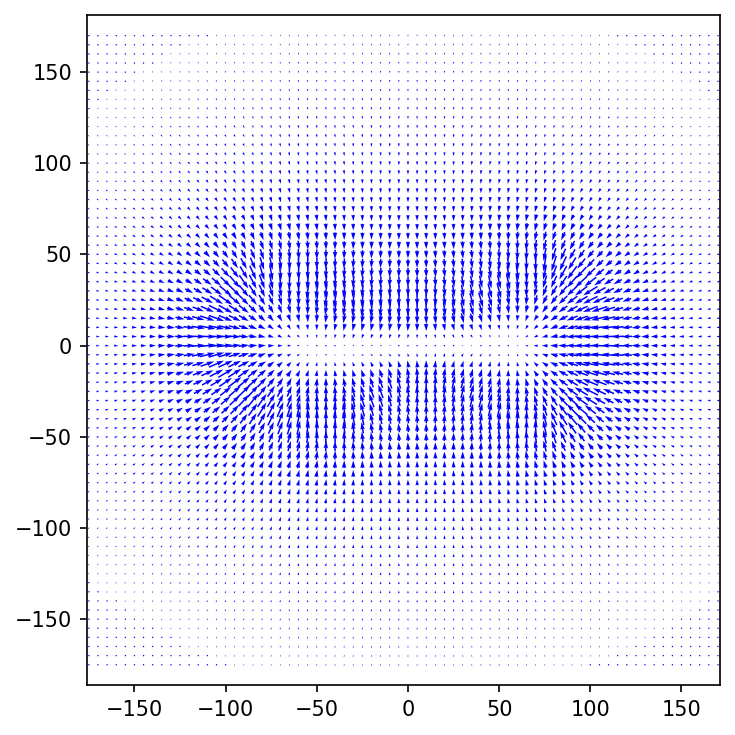

In [37]:
accelerations = np.array([i[1][:] for i in gravity_results])
accelerations = np.delete(accelerations, 2, 1)

plotX = computation_points[:, 0].reshape(len(X), -1)
plotY = computation_points[:, 1].reshape(len(Y), -1)

plotU = np.reshape(accelerations[:, 0], (len(X), -1))
plotV = np.reshape(accelerations[:, 1], (len(Y), -1))

fig, ax = plt.subplots(figsize=(5, 5), dpi=150)


ax.quiver(plotX, plotY, plotU, plotV, angles='xy', linewidth=0.1, color='b', pivot='mid', units='xy')

ax.axis('equal')
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())

fig.tight_layout()
plt.show()

## XZ-Plane of Kleopatra

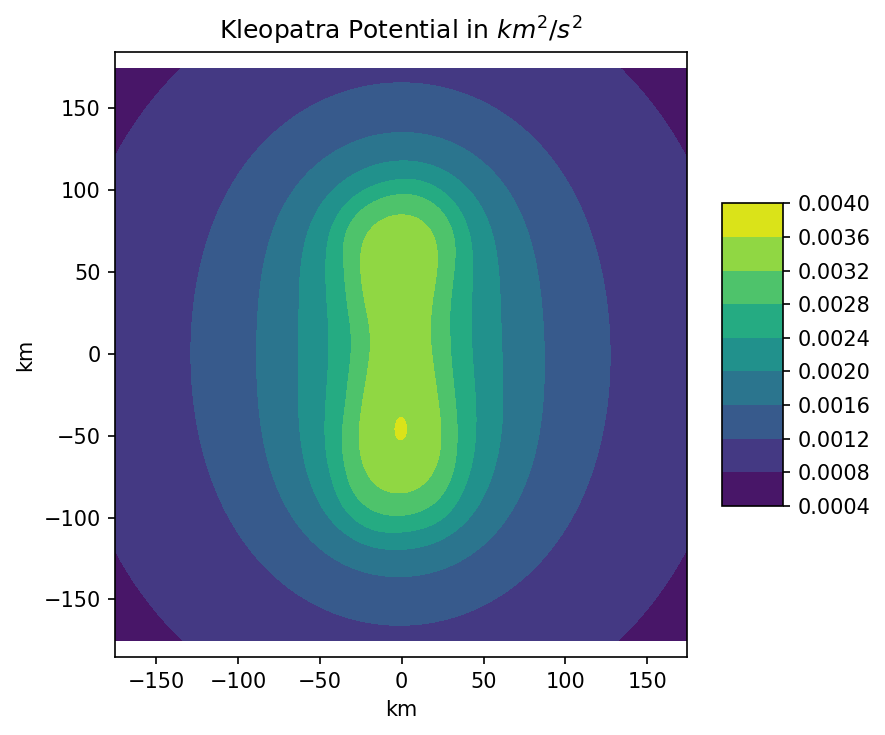

In [48]:
Z = np.arange(-175, 175, 1)
X = np.arange(-175, 175, 1)

# We require Y to be zero for the XZ plane
computation_points = np.array(np.meshgrid(X, [0], Z)).T.reshape(-1, 3)
gravity_results = evaluable_kleopatra(
    computation_points=computation_points,
)

potentials = np.array([i[0] for i in gravity_results])
potentials = potentials.reshape((len(X), len(Z)))

plotZ = computation_points[:, 2].reshape(len(Z), -1)
plotX = computation_points[:, 0].reshape(len(X), -1)
plotY = potentials.reshape((len(X), len(Z)))

fig, ax = plt.subplots(figsize=(6, 5), dpi=150)
surf = ax.contourf(plotZ, plotX, plotY, cmap=cm.viridis)

ax.set_title(f"Kleopatra Potential in ${evaluable_kleopatra.output_units[0]}$")
ax.axis('equal')
ax.set_xlim(Z.min(), Z.max())
ax.set_ylim(X.min(), X.max())

# Setting the x-axis and y-axis titles
ax.set_xlabel(kleopatra.mesh_unit)
ax.set_ylabel(kleopatra.mesh_unit)

fig.colorbar(surf, aspect=5, orientation='vertical', shrink=0.5)
fig.tight_layout()
plt.show()